# Cognitive Computing and AI Paradigms

This notebook introduces the concept of **Cognitive Computing** — systems that simulate human-like reasoning and decision-making. 

We'll contrast **traditional rule-based logic** with **machine learning-driven adaptability**, demonstrating how AI can observe, learn, and decide — just like human cognition.

---
### Objectives
- Understand how cognitive systems mimic human decision loops (observe → interpret → evaluate → decide)
- Build a conceptual flow diagram of cognitive processing
- Compare rule-based and learning-based decision systems
- Implement a simple ML model for adaptive decision-making


## 🧩 1. Human Decision Loop vs. Cognitive System

Humans use cognition to interpret information before acting:
1. **Observe:** Collect signals or data from the environment.
2. **Interpret:** Recognize patterns or anomalies.
3. **Evaluate:** Assess the situation using prior knowledge.
4. **Decide:** Choose the optimal action.

Cognitive computing replicates this logic — but at scale, speed, and consistency that humans cannot match. Below, we visualize this process.

In [17]:
from graphviz import Digraph

g = Digraph('CognitiveFlow', format='png')
g.attr(rankdir='LR', size='8,4')

g.attr('node', shape='ellipse', style='filled', fillcolor='lightblue')
g.node('A', 'Observe')
g.node('B', 'Interpret')
g.node('C', 'Evaluate')
g.node('D', 'Decide')

g.edges(['AB', 'BC', 'CD'])
g.attr(label='Human-Like Cognitive Decision Process')
g.render('cognitive_flow', view=True)

'cognitive_flow.png'

## ⚙️ 2. Rule-Based Decision Logic

Before machine learning, systems were entirely **rule-based**. Let's simulate a simple rule-based fraud detection system.

In [18]:
import pandas as pd
import numpy as np

# Simulated transaction data
np.random.seed(42)
data = pd.DataFrame({
    'amount': np.random.randint(100, 10000, 15),
    'frequency': np.random.randint(1, 10, 15)
})

def rule_based_fraud(amount, frequency):
    if amount > 8000 or frequency > 8:
        return 'Fraudulent'
    else:
        return 'Legit'

data['Decision'] = data.apply(lambda x: rule_based_fraud(x['amount'], x['frequency']), axis=1)
data

,amount,frequency,Decision
0,7370,5,Legit
1,960,1,Legit
2,5490,6,Legit
3,5291,9,Fraudulent
4,5834,1,Legit
5,6365,3,Legit
6,566,7,Legit
7,4526,4,Legit
8,5678,9,Fraudulent
9,8422,3,Fraudulent


This works — but it’s rigid. It doesn’t *learn* new thresholds or adapt when the transaction patterns evolve. Let’s upgrade it with machine learning.

## 🧮 3. Cognitive Learning via Machine Learning

We'll now train a simple **Logistic Regression model** to *learn* what makes a transaction fraudulent based on patterns, not hardcoded logic.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Expand dataset for ML simulation
np.random.seed(0)
df = pd.DataFrame({
    'amount': np.random.randint(100, 10000, 200),
    'frequency': np.random.randint(1, 10, 200)
})

# Label fraud if both amount and frequency are high
df['fraud'] = np.where((df['amount'] > 7000) & (df['frequency'] > 6), 1, 0)

# Train-test split
X = df[['amount', 'frequency']]
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f'Model Accuracy: {acc*100:.2f}%')

Model Accuracy: 96.67%


## 📊 4. Visualizing Decision Boundaries
Let’s visualize how the ML model separates legitimate and fraudulent transactions based on training patterns.

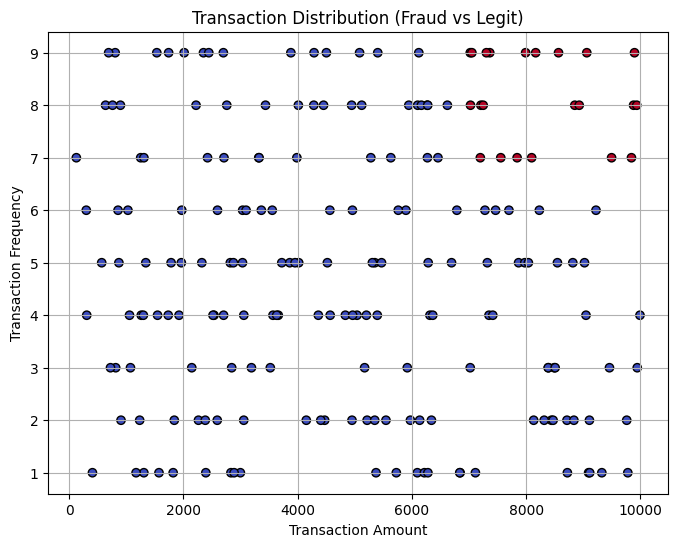

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['amount'], df['frequency'], c=df['fraud'], cmap='coolwarm', edgecolor='k')
plt.title('Transaction Distribution (Fraud vs Legit)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Frequency')
plt.grid(True)
plt.show()

## 🧭 5. Reflection and Insights

- Traditional systems rely on static, human-written rules.
- Cognitive computing systems learn, reason, and adapt dynamically.
- The combination of **data-driven learning** and **contextual reasoning** marks the transition from automation to cognition.

**Key takeaway:** Cognitive computing ≠ simple automation. It’s *adaptive intelligence* grounded in perception, learning, and reasoning loops.